In [1]:
from datetime import datetime
from dataretrieval import nwis
from metloom.pointdata import SnotelPointData
from metloom.variables import SnotelVariables

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

startDate = '2000-10-01'
endDate = '2025-09-30'

startDate_dt = datetime.strptime(startDate, '%Y-%m-%d')
endDate_dt = datetime.strptime(endDate, '%Y-%m-%d')

boise_river_outp = 'boise_river_snow2flow.csv'

# NWIS Variables
gage = '13185000' # Boise River Near Twin Springs

# Metloom Variables
snotel_stn = '830:ID:SNTL' # Trinity Mountain Snotel Station
snotel_pnt = SnotelPointData(station_id=snotel_stn, name='TrinityMtn')

variables = [snotel_pnt.ALLOWED_VARIABLES.SWE,
             snotel_pnt.ALLOWED_VARIABLES.TEMPAVG, 
             snotel_pnt.ALLOWED_VARIABLES.PRECIPITATION]

In [2]:
df_snotel = snotel_pnt.get_daily_data(startDate_dt, endDate_dt, variables)
df_snotel

,,geometry,SWE,SWE_units,AVG AIR TEMP,AVG AIR TEMP_units,PRECIPITATION,PRECIPITATION_units,datasource
datetime,site,,,,,,,,
2000-10-01 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,41.00,degF,0.2,in,NRCS
2000-10-02 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,36.68,degF,0.0,in,NRCS
2000-10-03 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,33.62,degF,0.0,in,NRCS
2000-10-04 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,35.06,degF,0.0,in,NRCS
2000-10-05 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,31.10,degF,0.0,in,NRCS
...,...,...,...,...,...,...,...,...,...
2025-09-26 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,48.02,degF,0.0,in,NRCS
2025-09-27 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,47.66,degF,0.0,in,NRCS
2025-09-28 08:00:00+00:00,830:ID:SNTL,POINT Z (-115.43818 43.62903 7790),0.0,in,52.70,degF,0.0,in,NRCS


In [3]:
df_streamflow = nwis.get_dv(sites=gage, parameterCd='00060', start=startDate, end=endDate)[0]
df_streamflow


,site_no,00060_Mean,00060_Mean_cd
datetime,,,
2000-10-01 00:00:00+00:00,13185000,307.0,A
2000-10-02 00:00:00+00:00,13185000,320.0,A
2000-10-03 00:00:00+00:00,13185000,311.0,A
2000-10-04 00:00:00+00:00,13185000,310.0,A
2000-10-05 00:00:00+00:00,13185000,309.0,A
...,...,...,...
2025-09-26 00:00:00+00:00,13185000,271.0,P
2025-09-27 00:00:00+00:00,13185000,269.0,P
2025-09-28 00:00:00+00:00,13185000,269.0,P


<Axes: xlabel='datetime'>

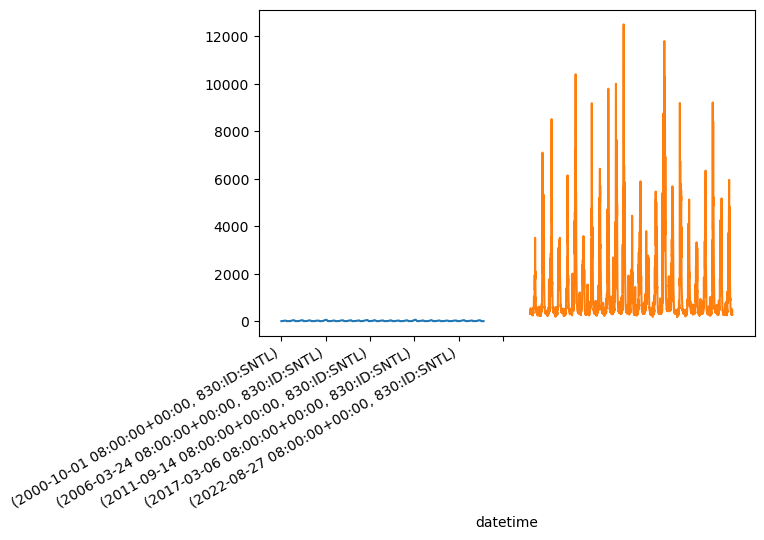

In [4]:
df_snotel['SWE'].plot()
df_streamflow['00060_Mean'].plot()

1. Create a date range for the combined dataframe
2. Get the data from the snotel dataframe
3. Convert units from snotel data
4. Get the data from the streamflow dataframe
5. Convert units for streamflow data
6. Export combined dataframe to a csv file (for later)

In [5]:
combined_dt = pd.date_range(start=startDate_dt, end=endDate_dt, freq='1D')
combined_dt

DatetimeIndex(['2000-10-01', '2000-10-02', '2000-10-03', '2000-10-04',
               '2000-10-05', '2000-10-06', '2000-10-07', '2000-10-08',
               '2000-10-09', '2000-10-10',
               ...
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28',
               '2025-09-29', '2025-09-30'],
              dtype='datetime64[ns]', length=9131, freq='D')

In [6]:
combined_swe = df_snotel['SWE'].values
combined_swe = combined_swe * 25.4 # in to mm conversion

combined_tavg = df_snotel['AVG AIR TEMP'].values
combined_tavg = (combined_tavg - 32.0)*(5/9) # °F to °C conversion

combined_prec = df_snotel['PRECIPITATION'].values
combined_prec = combined_prec * 25.4 # in to mm conversion

In [7]:
combined_q = df_streamflow['00060_Mean'].values
combined_q = combined_q * (1/(3.2808**3))

In [8]:
combined_data = {
    'datetime': combined_dt,
    'prec_mm': combined_prec,
    'tavg_degc': combined_tavg,
    'swe_mm': combined_swe,
    'flow_cms': combined_q,
}


In [9]:
df_combined = pd.DataFrame(combined_data)
df_combined = df_combined.set_index('datetime')
df_combined.to_csv(boise_river_outp)
df_combined

,prec_mm,tavg_degc,swe_mm,flow_cms
datetime,,,,
2000-10-01,5.08,5.0,0.00,8.693589
2000-10-02,0.00,2.6,0.00,9.061721
2000-10-03,0.00,0.9,0.00,8.806861
2000-10-04,0.00,1.7,0.00,8.778543
2000-10-05,0.00,-0.5,0.00,8.750225
...,...,...,...,...
2025-09-26,0.00,8.9,0.00,7.674145
2025-09-27,0.00,8.7,0.00,7.617510
2025-09-28,0.00,11.5,0.00,7.617510


<Axes: xlabel='datetime'>

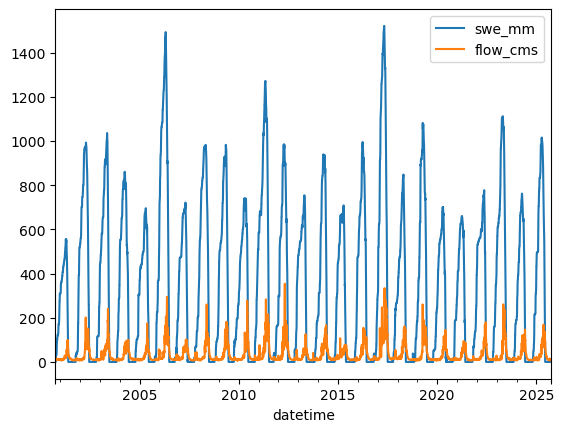

In [10]:
df_combined[['swe_mm','flow_cms']].plot()
